<a href="https://colab.research.google.com/github/Joabetf/Joabetf/blob/main/An%C3%A1lise%20de%20dados%20FNMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados
## Base:



---



Sobre a base:

A base apresenta dados sobre projetos de proteção e recuperação do meio ambiente realizado pelo Fundo Nacional do Meio Ambiente (FNMA), que, por sua vez, é uma unidade do Ministério do Meio Ambiente (MMA), criada com o objetivo de financiar a Política Nacional do Meio Ambiente (PNMA). A PNMA é uma lei que define meios de proteção ambiental no Brasil.
O banco de dados apresenta os projetos realizados no Brasil de 1990 à 2022, bem como os biomas, estados e cidades em que foram realizados. Além disso, a base apresenta os recursos enviados e os recursos de contrapartida, e a data de início e fim.




---






Conjuntos de dados sobre repasse do fundo nacional do meio ambiente:


*   Ano
*   N° CV SIAFI/SICONV
*   N° CV Interno
*   Tema
*   Instituição Convenente
*   Título do Projeto
*   Unidade Federativa
*   Região Geográfica
*   Cidade da instituição Convenente
*   Bioma
*   Esfera institucional
*   Data Assinada
*   Data de Publicação
*   Data de Fim da Vigência
*   Recursos do FNMA
*   Recursos de CP
*   Valor Total do Projeto
*   Tipo de Seleção do Projeto
*   Ação, Edital ou termo de referência de origem do projeto

## Questões:
1- Quanto cada bioma recebeu de recurso entre 2000 e 2022?

2- Qual montante de recurso que cada estado recebeu?

3-  Como foi o recebimento de projetos do RN ao longo dos anos?

4- Qual o total de projetos por bioma?

5- Quantas cidades foram beneficiadas com projetos de educação ambiental?

6- Quais os temas com o maior número de projetos?

7- Qual foi o número de projetos com o passar dos anos?

8- Montante de recursos de cada instituição?

9- Total de recursos por década?

10- Qual o total de recursos enviados?

11- Montante recebido do FNMA por cada bioma?

12- Recebimento de recursos da região centro-oeste ao longo dos anos?

13- Quantidade de projetos recebidos por cada esfera institucional ao longo dos anos?

14- Montante dos recursos recebidos por cada esfera institucional

15- Quais cidades receberam mais recursos no período de 2000 a 2020?

16- Total de projetos recebidos por cada bioma.

17- Quantidade de projetos destinados à Amazônia entre 2010 e 2020.

18- Montante de recursos recebidos pelo RN entre 2000 e 2020.

19- Montante dos recursos recebidos por cada bioma ao longo dos anos.

20- Qual o total de repasse para editais voltados para qualidade ambiental?









In [ ]:
!pip install matplotlib
from matplotlib import pyplot

In [ ]:
import urllib.request
import csv

def fazer_requisicao(url):
    response = urllib.request.urlopen(url)
    conteudo = response.read().decode('utf-8')
    if conteudo.startswith('\ufeff'):
      conteudo = conteudo[1:]
    return conteudo

# transformar url em arquivo
url = "https://raw.githubusercontent.com/rejunly/fnma-fundos/main/projetos_fnma_1990_a_2022__dados_abertos-3.csv"
arquivo = fazer_requisicao(url)

#Separar linhas e colunas
linhas = arquivo.split('\n')
ler_csv = csv.reader(linhas, delimiter=";")

cabecalho = next(ler_csv) # Obter o cabeçalho com o nome das colunas

In [ ]:
#função grafico de pizza
def piz(legenda,dicionario):
  pyplot.figure(figsize=(15,10))
  pyplot.title(legenda)
  pyplot.pie(dicionario.values(), labels= dicionario.keys(),autopct='%.2f%%')
  pyplot.show()

#função grafico de barra
def bar(x,y,dicionario,legenda,numero):
  pyplot.figure(figsize=(x, y))
  pyplot.bar(dicionario.keys(), dicionario.values(), color="black")
  pyplot.title(legenda)
  pyplot.figure(numero)

#função gráfico de linhas
def lin(x, y, titulo, rotulo_x, rotulo_y):
    pyplot.figure(figsize=(15,10))
    pyplot.plot(x, y, marker='o', linestyle='-', color='b')
    pyplot.title(titulo)
    pyplot.xlabel(rotulo_x)
    pyplot.ylabel(rotulo_y)
    pyplot.grid(True)
    pyplot.show()

def calcular_quantidade_projetos_por_bioma(ler_csv):
    biomas = {
        'Cerrado': 0,
        'Pampa': 0,
        'Amazônia': 0,
        'Pantanal': 0,
        'Caatinga': 0,
        'Mata Atlântica': 0,
        'Marítimo': 0
    }

    for linha in ler_csv:
        if linha:
            bioma = linha[9]  # Acesso ao campo 'Bioma' como chave do dicionário
            if bioma in biomas:
                biomas[bioma] += 1

    return biomas

Quantidade de projetos por bioma: {'Cerrado': 201, 'Pampa': 10, 'Amazônia': 253, 'Pantanal': 11, 'Caatinga': 129, 'Mata Atlântica': 746, 'Marítimo': 46}


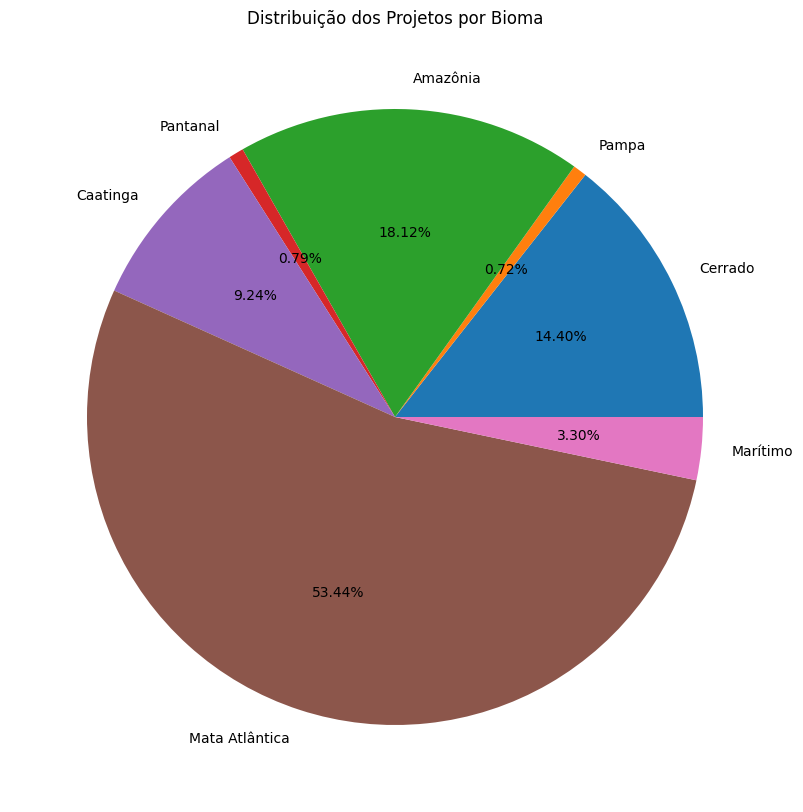

In [ ]:
# 4 - Quantidade de projetos por bioma

biomas_quantidade = calcular_quantidade_projetos_por_bioma(ler_csv)
print("Quantidade de projetos por bioma:", biomas_quantidade)

piz("Distribuição dos Projetos por Bioma", biomas_quantidade)




Os temas com o maior número de projetos são:
Educação Ambiental: 285 projetos
Gestão de Áreas Protegidas: 224 projetos
Água e Floresta: 209 projetos
Qualidade Ambiental: 173 projetos
Planejamento e Gestão Territorial : 136 projetos


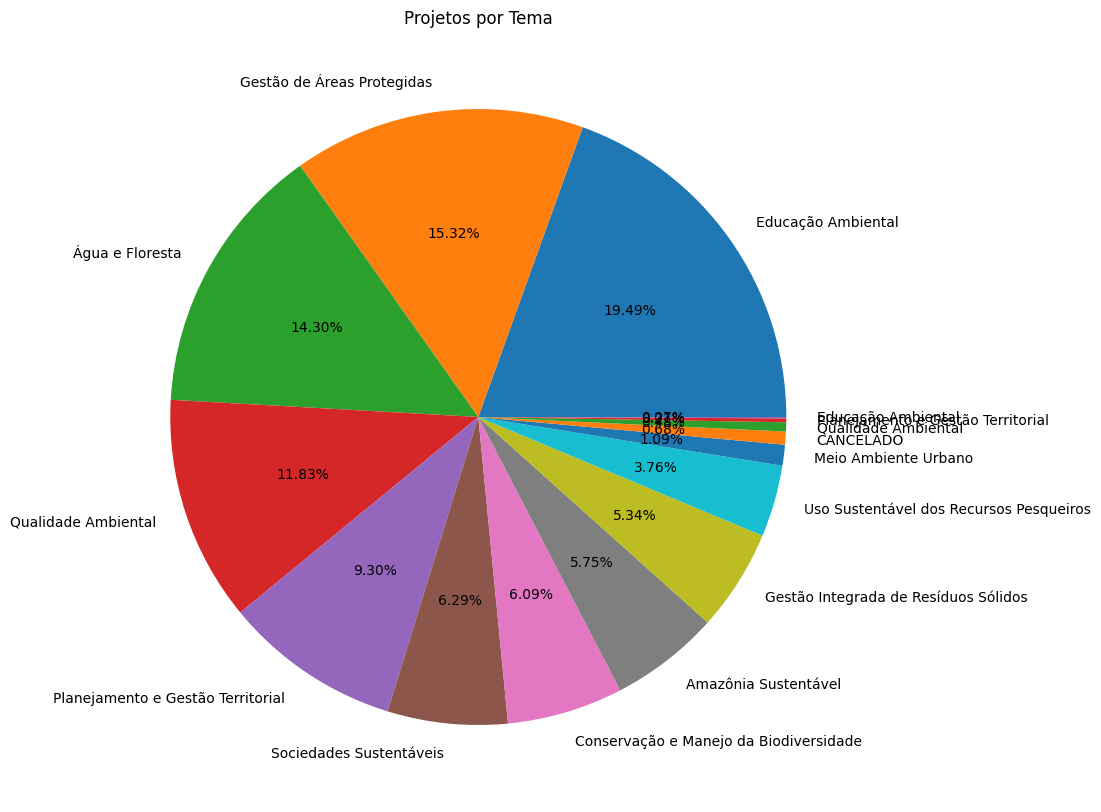

In [ ]:
#6 - Quais os temas com o maior número de projetos?
ler_csv = csv.DictReader(linhas, delimiter=";")
temas_projetos = {}

for linha in ler_csv:
    tema = linha['Tema']
    temas_projetos[tema] = temas_projetos.get(tema, 0) + 1

temas_projetos_ordenados = dict(sorted(temas_projetos.items(), key=lambda item: item[1], reverse=True))

num_temas_mostrar = 5
temas_mais_projetos = list(temas_projetos_ordenados.keys())[:num_temas_mostrar]
print("Os temas com o maior número de projetos são:")
for tema in temas_mais_projetos:
    print(f"{tema}: {temas_projetos_ordenados[tema]} projetos")

# Plotar o gráfico de pizza com os temas e a contagem de projetos
piz("Projetos por Tema", temas_projetos_ordenados)


{1990: 14, 1991: 67, 1992: 59, 1993: 110, 1994: 51, 1995: 99, 1996: 103, 1997: 58, 1998: 22, 1999: 26, 2000: 108, 2001: 146, 2002: 102, 2003: 76, 2004: 116, 2005: 90, 2006: 112, 2007: 34, 2010: 6, 2011: 3, 2012: 16, 2013: 1, 2014: 13, 2015: 3, 2016: 7, 2017: 2, 2018: 16, 2020: 1}


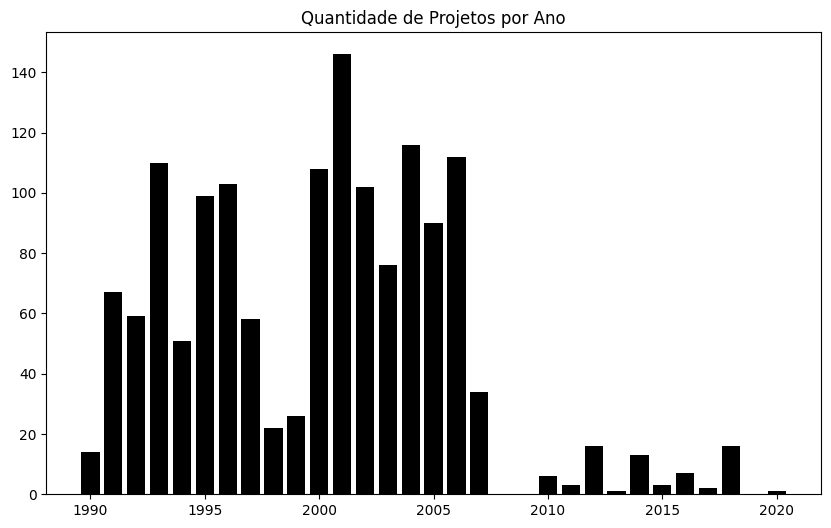

In [ ]:
#7- Qual foi o número de projetos com o passar dos anos?

# Separar linhas e colunas
linhas = arquivo.split('\n')

# Usar DictReader para ler o arquivo considerando o cabeçalho
ler_csv = csv.DictReader(linhas, delimiter=";")
cabecalho = next(ler_csv) # Obter o cabeçalho com o nome das colunas

anos_projetos = {}

for linha in ler_csv:
    # Acessar o ano usando a chave 'Ano'
    ano = int(linha['Ano'])
    if ano not in anos_projetos:
        anos_projetos[ano] = 1
    else:
        anos_projetos[ano] += 1

print(anos_projetos)

bar(10, 6, anos_projetos, "Quantidade de Projetos por Ano", 1)

Total de recursos do FNMA na década de 1990: R$ 37158330.80
Total de recursos do FNMA na década de 2000: R$ 194150087.61
Total de recursos do FNMA na década de 2010: R$ 47052148.45
Total de recursos do FNMA na década de 2020: R$ 12040350.64


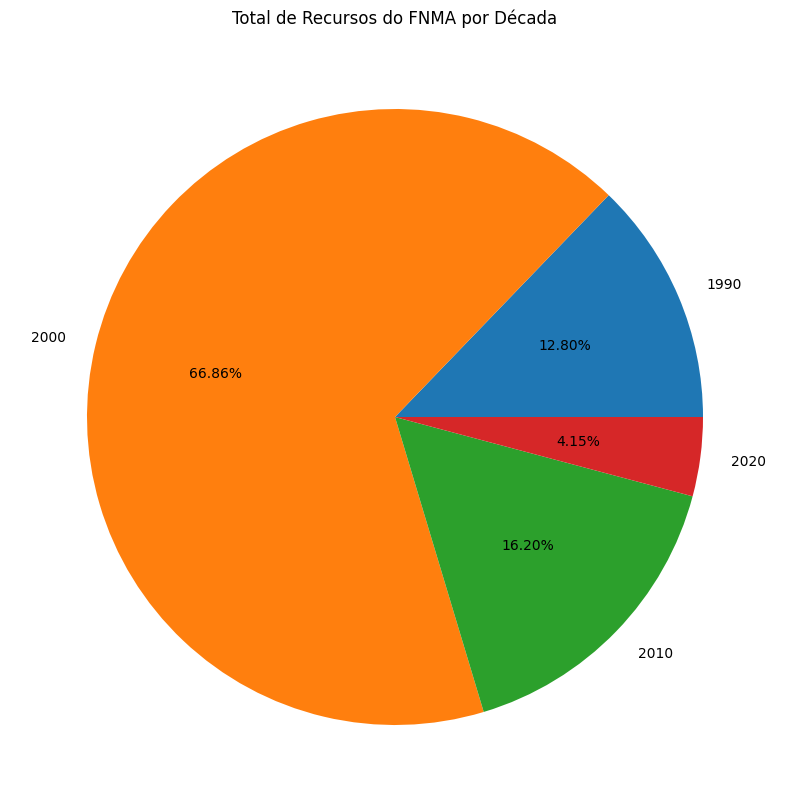

In [ ]:
#9 - Total de recursos em R$ do FNMA em cada década

ler_csv = csv.DictReader(linhas, delimiter=";")
cabecalho = next(ler_csv)

# Criar um dicionário para armazenar os totais de recursos por década
total_recursos_por_decada = {}

# Iterar pelas linhas de dados
for linha in ler_csv:
    # Extrair o valor dos recursos do FNMA e o ano
    recursos_fnma_str = linha[" Recursos do FNMA (R$) "].replace(".", "").replace(",", ".").strip()  # Coluna "Recursos do FNMA (R$)"
    if recursos_fnma_str:
        recursos_fnma = float(recursos_fnma_str)
        ano = int(linha["Ano"])  # Coluna "Ano"

        # Calcular a década correspondente ao ano
        decada = (ano // 10) * 10

        # Adicionar o valor dos recursos à década correspondente no dicionário
        if decada in total_recursos_por_decada:
            total_recursos_por_decada[decada] += recursos_fnma
        else:
            total_recursos_por_decada[decada] = recursos_fnma

# Imprimir os totais de recursos do FNMA por década
for decada, total_recursos in total_recursos_por_decada.items():
    print(f"Total de recursos do FNMA na década de {decada}: R$ {total_recursos:.2f}")

# Criar o gráfico de pizza usando a função 'piz'
legenda_grafico = "Total de Recursos do FNMA por Década"
piz(legenda_grafico, total_recursos_por_decada)


O total de recursos enviados para a região centro oeste foi de: R$49758631.59 reais


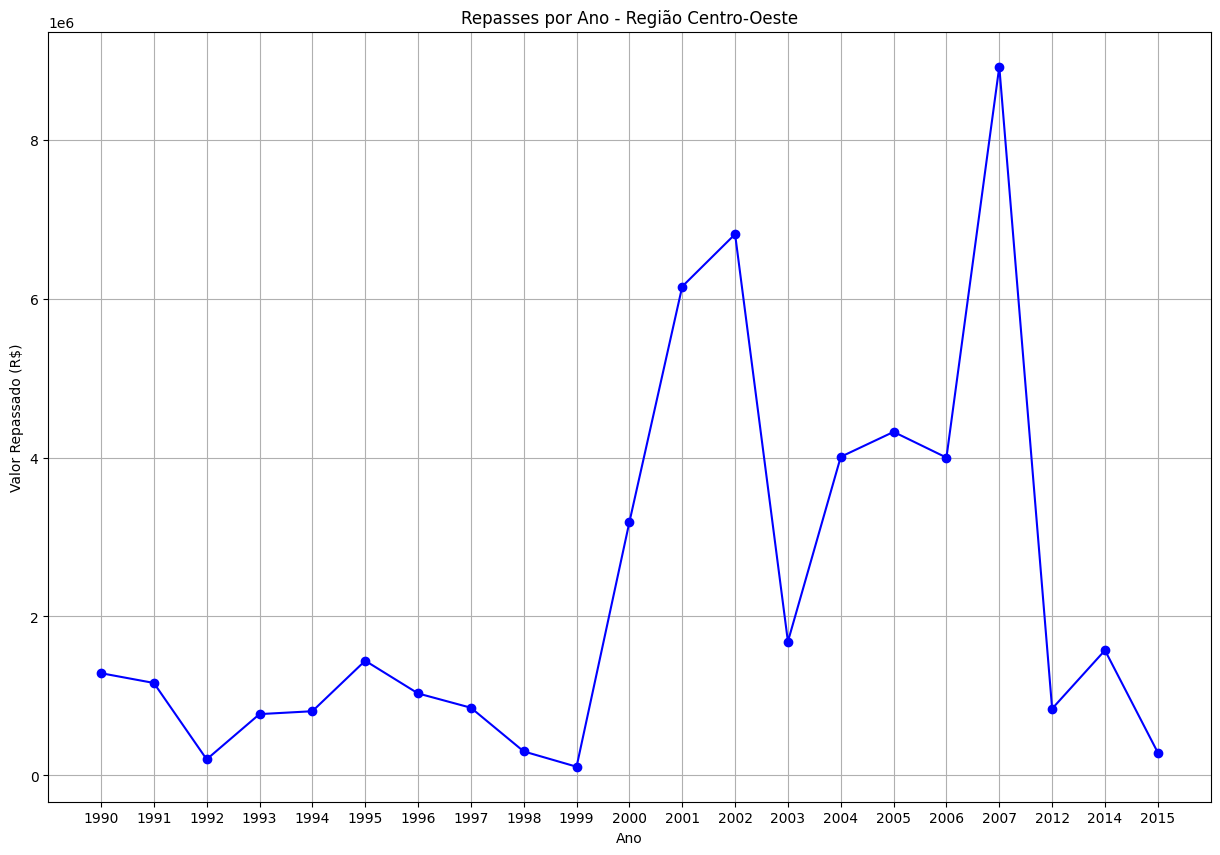

In [ ]:
#12- Recebimento de recursos da região centro-oeste ao longo dos anos?

regiao = cabecalho.index('Região Geográfica')
val = cabecalho.index(' Valor Total do Projeto (R$) ')

ler_csv = csv.reader(linhas, delimiter=";")
repasse_total = 0
repasse_por_ano = {}

for linha in ler_csv:
    if linha:
        if len(linha) > val +1:
            if linha[regiao] == 'Centro Oeste' or linha[regiao] == 'Centro-Oeste':
                repasse = linha[val]
                repasse = repasse.replace('.','')
                repasse = repasse.replace(',', '.')  # substituir vírgulas por pontos
                repasse = float(repasse)
                repasse_total = repasse + repasse_total

                ano = linha[0]  # Coluna com o ano do projeto
                if ano in repasse_por_ano:
                    repasse_por_ano[ano] += repasse
                else:
                    repasse_por_ano[ano] = repasse

print(f'O total de recursos enviados para a região centro oeste foi de: R${repasse_total} reais')
anos = list(repasse_por_ano.keys())
valores = list(repasse_por_ano.values())

lin(anos, valores, "Repasses por Ano - Região Centro-Oeste", "Ano", "Valor Repassado (R$)")

#A partir de 2015, dados sobre a região centro oeste não são achados na base

A quantidade de projetos da esfera Municipal é: 446
A quantidade de projetos da esfera Federal é: 147
A quantidade de projetos da esfera Estadual é: 185
A quantidade de projetos da esfera OSC é: 677


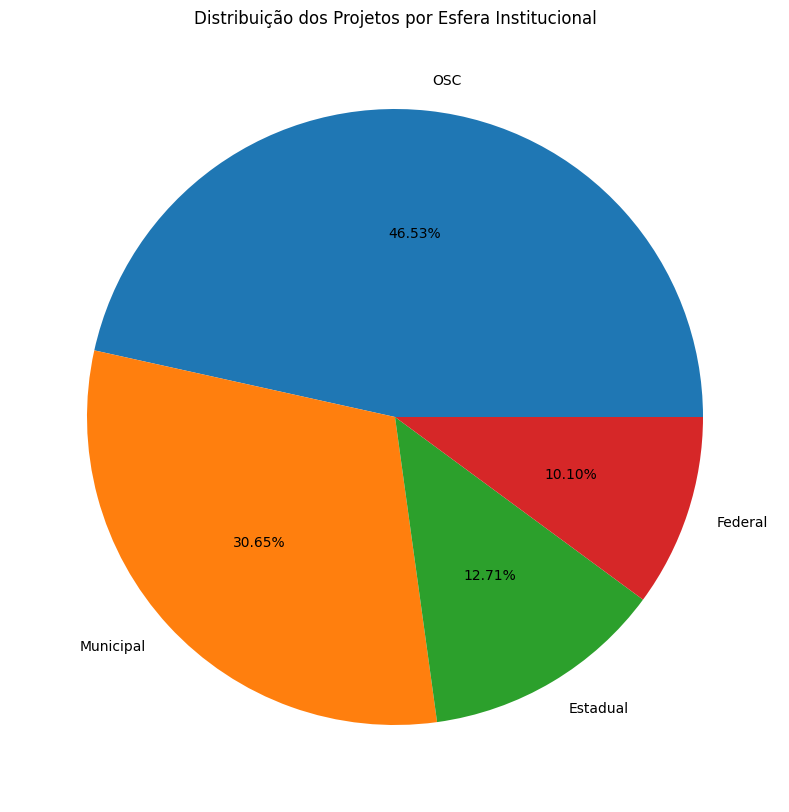

In [ ]:
# 13- Quantidade de projetos recebidos por cada esfera institucional ao longo dos anos?

ler_csv = csv.reader(linhas, delimiter=";")

municipal = 0
federal = 0
estadual = 0
osc = 0

ei = cabecalho.index('Esfera Institucional')
tema = cabecalho.index('Tema')


for linha in ler_csv:
    if linha:
        if linha[ei] == 'Municipal':
            municipal += 1
        if linha[ei] == 'Federal':
            federal += 1
        if linha[ei] == 'Estadual':
            estadual += 1
        if linha[ei] == 'OSC':
            osc += 1
print(f'A quantidade de projetos da esfera Municipal é: {municipal}')
print(f'A quantidade de projetos da esfera Federal é: {federal}')
print(f'A quantidade de projetos da esfera Estadual é: {estadual}')
print(f'A quantidade de projetos da esfera OSC é: {osc}')

legenda_grafico = 'Distribuição dos Projetos por Esfera Institucional'
dicionario_esferas = {'OSC': osc, 'Municipal': municipal, 'Estadual': estadual, 'Federal': federal}
piz(legenda_grafico, dicionario_esferas)



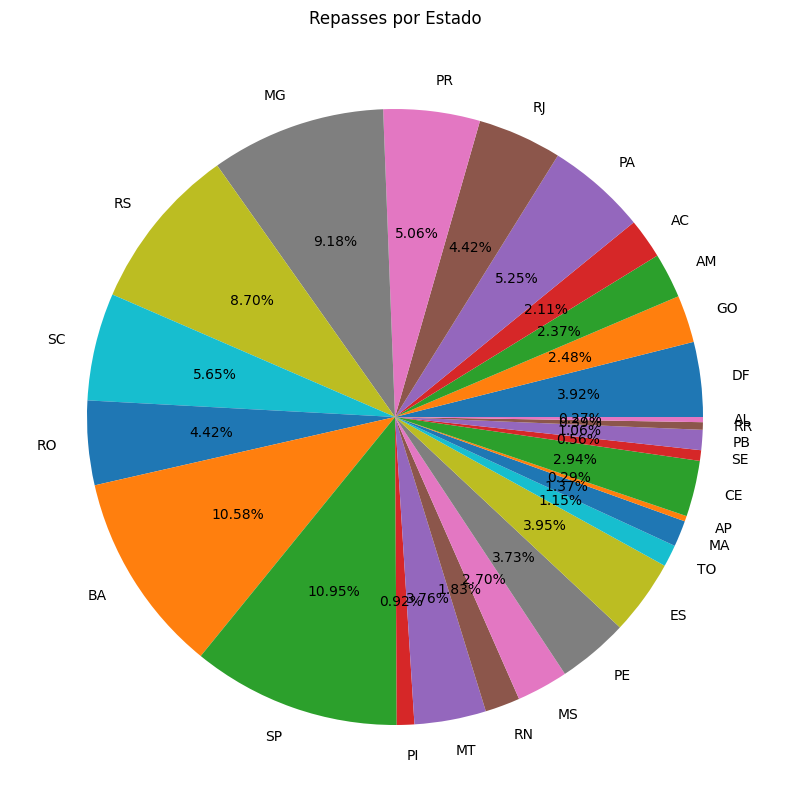

In [ ]:
#15 - Quais estados receberam mais recursos no período de 2000 a 2020?

ler_csv = csv.reader(linhas, delimiter=";")

val = cabecalho.index(' Valor Total do Projeto (R$) ')
estado = cabecalho.index('UF')

#Calcular o valor dos repasses por estado
repasse_por_estado = {}

for linha in ler_csv:
    if linha and len(linha) > max(val, estado):
        repasse_str = linha[val]
        repasse_str = repasse_str.replace('.', '').replace(',', '.')  # substituir vírgulas por pontos
        try:
            repasse = float(repasse_str)
        except ValueError:
            continue  # Ignorar linhas inválidas que não puderem ser convertidas para float

        estado_projeto = linha[estado]
        if estado_projeto in repasse_por_estado:
            repasse_por_estado[estado_projeto] += repasse
        else:
            repasse_por_estado[estado_projeto] = repasse

# Agora que temos o dicionário 'repasse_por_estado' com o valor total dos repasses por estado,
# podemos chamar a função 'piz' para criar o gráfico de pizza.

legenda_grafico = 'Repasses por Estado'
piz(legenda_grafico,repasse_por_estado)


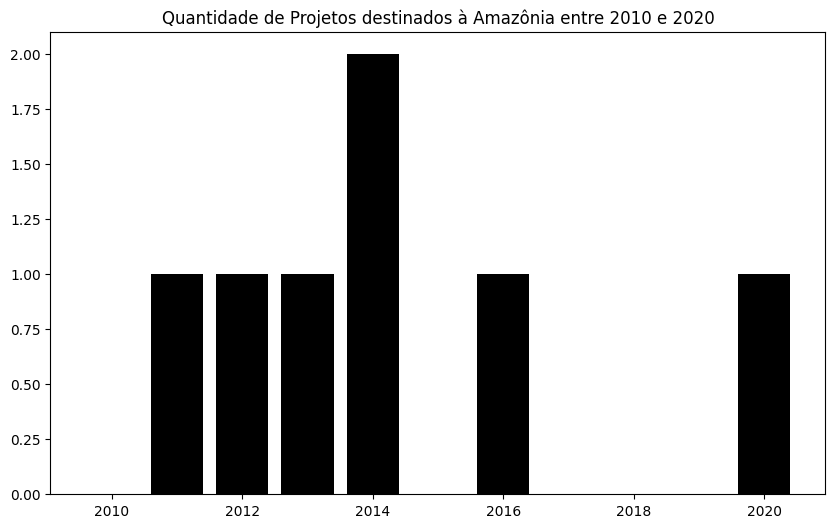

In [ ]:
#17- Quantidade de projetos destinados à Amazônia entre 2010 e 2020.

# DictReader para ler o arquivo com o cabeçalho
ler_csv = csv.DictReader(linhas, delimiter=";")
cabecalho = next(ler_csv)

# armazena a quantidade de projetos destinados à Amazônia por ano
projetos_amazonia_por_ano = {}

# Contagem de 2010 a 2020
for ano in range(2010, 2021):
    projetos_amazonia_por_ano[ano] = 0

for linha in ler_csv:
    ano = int(linha['Ano'])
    bioma = linha['Bioma']

    # O projeto é destinado à Amazônia e está entre 2010 e 2020?
    if bioma == 'Amazônia' and 2010 <= ano <= 2020:
        projetos_amazonia_por_ano[ano] += 1

# Plotar o gráfico usando a função 'bar'
legenda_grafico = 'Quantidade de Projetos destinados à Amazônia entre 2010 e 2020'
bar(10, 6, projetos_amazonia_por_ano, legenda_grafico, 1)

Montante de recursos recebidos pelo bioma cerrado: R$ 43089828.64
Montante de recursos recebidos pelo bioma amazônia: R$ 59608262.20
Montante de recursos recebidos pelo bioma mataatlântica: R$ 141255052.98
Montante de recursos recebidos pelo bioma marítimo: R$ 5961776.29
Montante de recursos recebidos pelo bioma caatinga: R$ 34549820.48
Montante de recursos recebidos pelo bioma pantanal: R$ 1256593.64
Montante de recursos recebidos pelo bioma pampas: R$ 241236.64
Montante de recursos recebidos pelo bioma pampa: R$ 2386500.77
Montante de recursos recebidos pelo bioma orla: R$ 288038.86


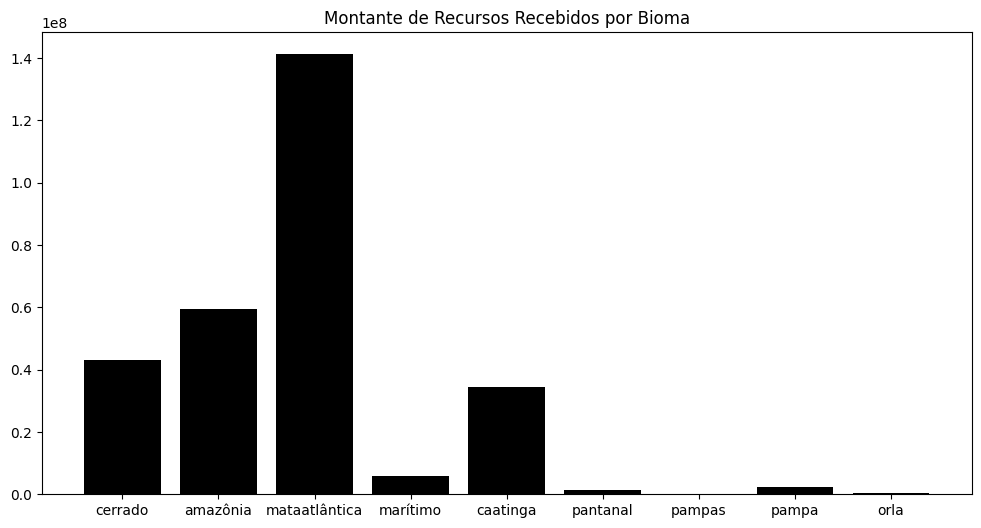

In [ ]:
# 19- Montante dos recursos recebidos por cada bioma ao longo dos anos.


ler_csv = csv.DictReader(linhas, delimiter=";")
cabecalho = next(ler_csv)

# Criar um dicionário para armazenar os montantes de recursos por bioma (agrupando biomas com diferentes caracteres)
montante_recursos_por_bioma = {}

# Iterar pelas linhas de dados
for linha in ler_csv:
    # Extrair o valor dos recursos do FNMA e o bioma
    recursos_fnma_str = linha[" Recursos do FNMA (R$) "].replace(".", "").replace(",", ".").strip()  # Coluna "Recursos do FNMA (R$)"
    if recursos_fnma_str:
        recursos_fnma = float(recursos_fnma_str)
        bioma = linha["Bioma"]

        # Remover caracteres especiais, espaços e converter para letras minúsculas para agrupar os biomas corretamente
        bioma_limpo = bioma.lower().replace("/", "").replace(" ", "")

        # Ignorar entradas vazias
        if bioma_limpo:
            # Adicionar o valor dos recursos ao bioma correspondente no dicionário
            if bioma_limpo in montante_recursos_por_bioma:
                montante_recursos_por_bioma[bioma_limpo] += recursos_fnma
            else:
                montante_recursos_por_bioma[bioma_limpo] = recursos_fnma
del montante_recursos_por_bioma['mataatlânticacaatinga']
del montante_recursos_por_bioma['mataatlânticacerrado']
del montante_recursos_por_bioma['cerradocaatinga']
del montante_recursos_por_bioma['cerradoamazônia']
# Imprimir os montantes de recursos por bioma
for bioma, montante_recursos in montante_recursos_por_bioma.items():
    print(f"Montante de recursos recebidos pelo bioma {bioma}: R$ {montante_recursos:.2f}")

# Criar o gráfico de barras usando a função 'bar'
legenda_grafico = 'Montante de Recursos Recebidos por Bioma'
bar(12, 6, montante_recursos_por_bioma, legenda_grafico, 1)

O total de repasse para editais voltados para o tema "Qualidade Ambiental" foi de: R$59010309.91 reais


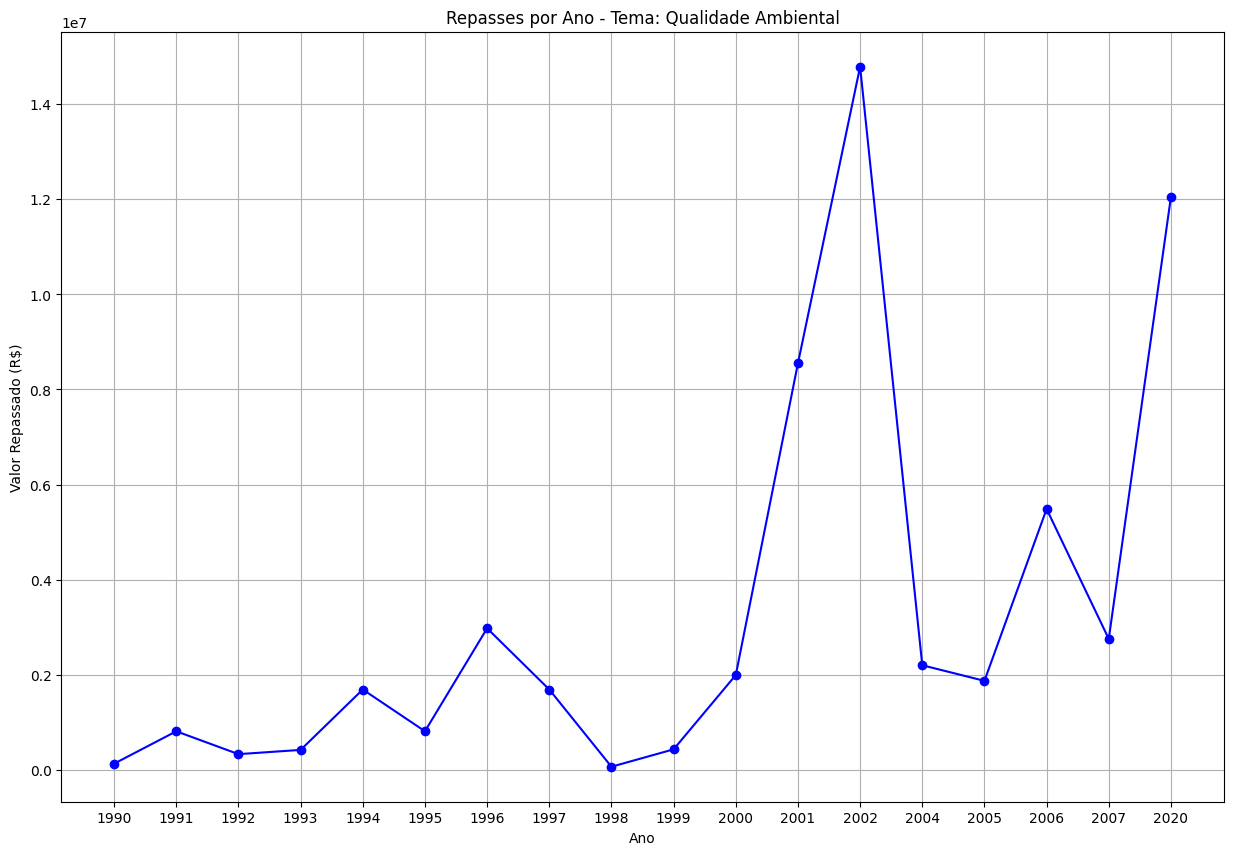

In [ ]:
#20- Qual o total de repasse para editais voltados para qualidade ambiental?

#Obter as colunas necessárias (valor total do projeto e editais)
ler_csv = csv.DictReader(linhas, delimiter=";")

#Calcular o valor dos repasses
repasse_total = 0
repasse_por_ano = {}
for linha in ler_csv:
    if linha:
        if len(linha) > val:
          if linha['Tema'] == 'Qualidade Ambiental':
              repasse = linha[' Valor Total do Projeto (R$) ']
              repasse = repasse.replace('.','')
              repasse = repasse.replace(',', '.')  # substituir vírgulas por pontos
              repasse = float(repasse)
              repasse_total = repasse + repasse_total

              ano = linha['Ano']  # Coluna com o ano do projeto
              if ano in repasse_por_ano:
                repasse_por_ano[ano] += repasse
              else:
                repasse_por_ano[ano] = repasse

print(f'O total de repasse para editais voltados para o tema "Qualidade Ambiental" foi de: R${repasse_total:.2f} reais')

# Criar o gráfico de linhas
anos = list(repasse_por_ano.keys())
valores = list(repasse_por_ano.values())
lin(anos, valores, "Repasses por Ano - Tema: Qualidade Ambiental", "Ano", "Valor Repassado (R$)")

#A partir de 2007, não há registros de editais para o tema de qualidade ambiental, até 2020